# Payal Rathod

### The Sparks Foundation - Data Science & Business Analytics Internship

### TASK 2 - Prediction using Unsupervised Machine Learning

From a given dataset of Iris predict the optimum number of clusters and represent it visually.

#### Importing  necessary  libraties


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('Iris.xls')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Get the count of rows & columns in the datset
df.shape

(150, 6)

In [5]:
# Get column names from dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Explore the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

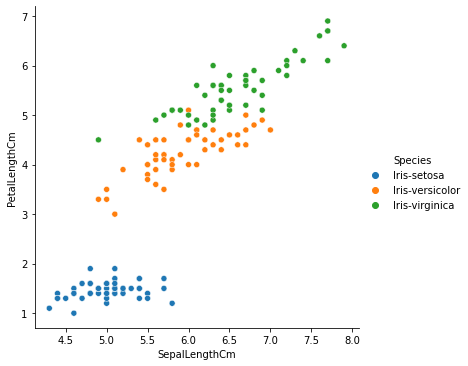

In [12]:
sns.relplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=df)

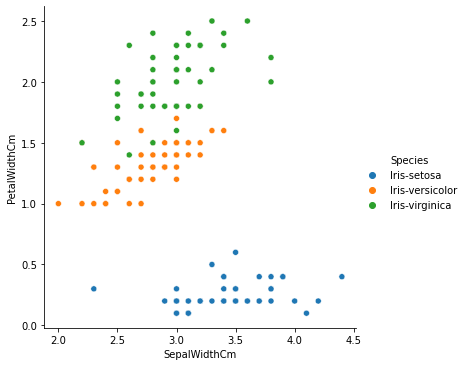

In [13]:
sns.relplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=df)

In [14]:
#Drop the columns ID and Species because it is an unsupervised learning problem
new_df = df.drop(columns= ['Species','Id'])
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Find the optimal number of clusters. How does one determine the value of K?

Text(0, 0.5, 'Within-cluster Sum of Squares')

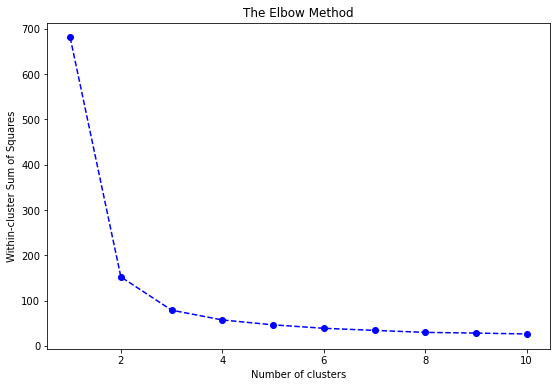

In [15]:
from sklearn.cluster import KMeans
plt.figure(figsize=(9,6))
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(new_df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss,'bo--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Elbow method is used to find optimum number of clusters. When within-cluster sum of squares doesn't decrease significantly with every iteration. From above graph it is clear that optimum no of clusters is 3.

### Bulid the model using K_means 

In [16]:
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = kmodel.fit_predict(new_df)
print(kmodel.inertia_)

78.94084142614601


### Visualising the clusters from graph

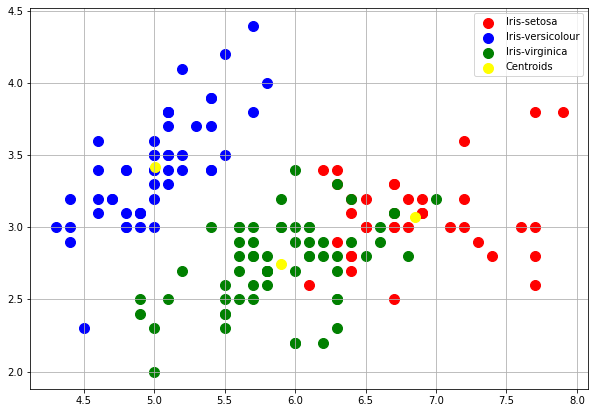

In [17]:
plt.figure(figsize=(10,7))
x = new_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmodel.cluster_centers_[:,0], kmodel.cluster_centers_[:,1], s=100, c= 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()